In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import easyocr
import imutils
import random

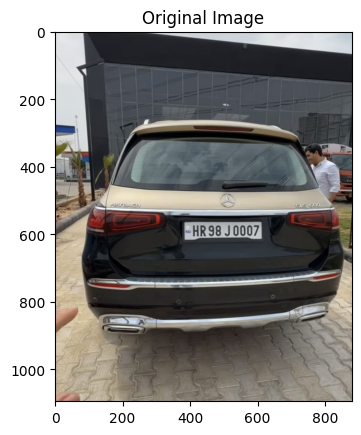

In [2]:
img = cv2.imread('plate.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

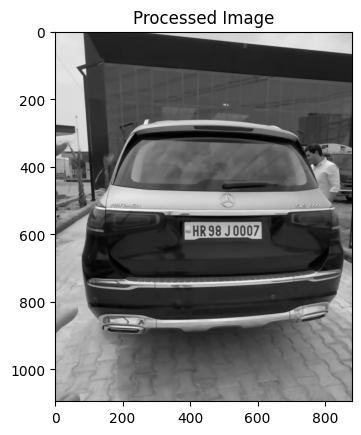

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
plt.imshow(cv2.cvtColor(bfilter, cv2.COLOR_BGR2RGB))
plt.title('Processed Image')
plt.show()

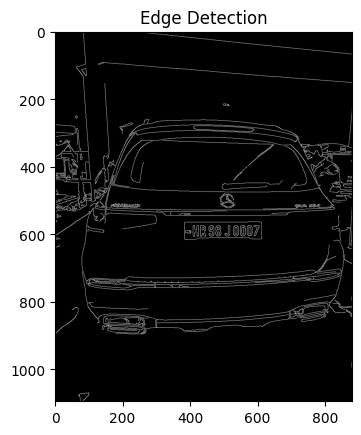

In [4]:
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
plt.title('Edge Detection')
plt.show()

In [5]:
# Find contours
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

# Loop through contours to find the best possible approximation of the license plate
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

print("Location: ", location)


Location:  [[[609 565]]

 [[385 565]]

 [[382 615]]

 [[607 615]]]


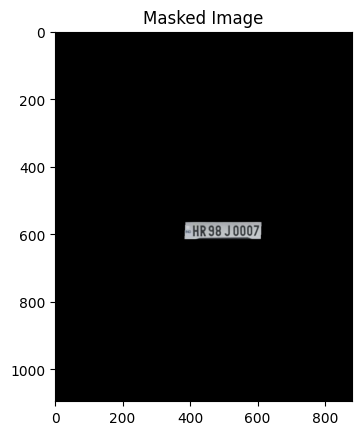

In [6]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)  # Draw contours on the mask image
new_image = cv2.bitwise_and(img, img, mask=mask)  # Apply the mask to the original image
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.title('Masked Image')
plt.show()

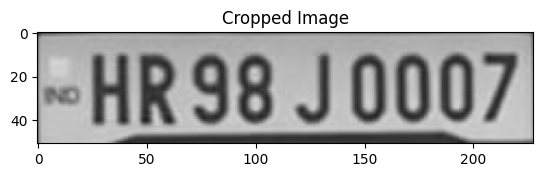

In [7]:
# Get coordinates of the number plate area
(x, y) = np.where(mask == 255)  
(x1, y1) = (np.min(x), np.min(y)) 
(x2, y2) = (np.max(x), np.max(y))  

# Crop the image to get the number plate region
cropped_image = gray[x1:x2+1, y1:y2+1]

# Display the cropped image
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.show()

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
c:\Users\RG-Lapi\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Detected Text:  HR98 J 0007


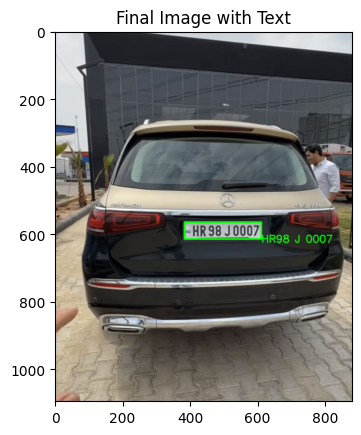

In [8]:
# Use EasyOCR to read the text from the cropped image
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)

# Extract the text from the OCR result
text = result[0][-2]
print("Detected Text: ", text)

# Put the text on the original image and draw a rectangle around the number plate
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(location[0][0][0], location[1][0][1] + 60), fontFace=font, fontScale=1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(location[0][0]), tuple(location[2][0]), (0, 255, 0), 3)

# Display the final image with the overlaid text and rectangle
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.title('Final Image with Text')
plt.show()
